In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("Downloads/AI vs Player Scoresheet - All_AI_Data.csv")
df.head()

,AI_Level,Games,Winner,Avg_Move_TIme,Observations
0,Beginner AI,Game 1,Player,0.000150,AI wasn't aware of my moves
1,Beginner AI,Game 2,Player,0.000125,AI again wasn't aware of my moves
2,Beginner AI,Game 3,Player,0.000100,Easy win going the the same column
3,Beginner AI,Game 4,Player,0.000100,Game took a bit longer but feels easy to win
4,Beginner AI,Game 5,Player,0.000100,AI wasn't aware of my moves


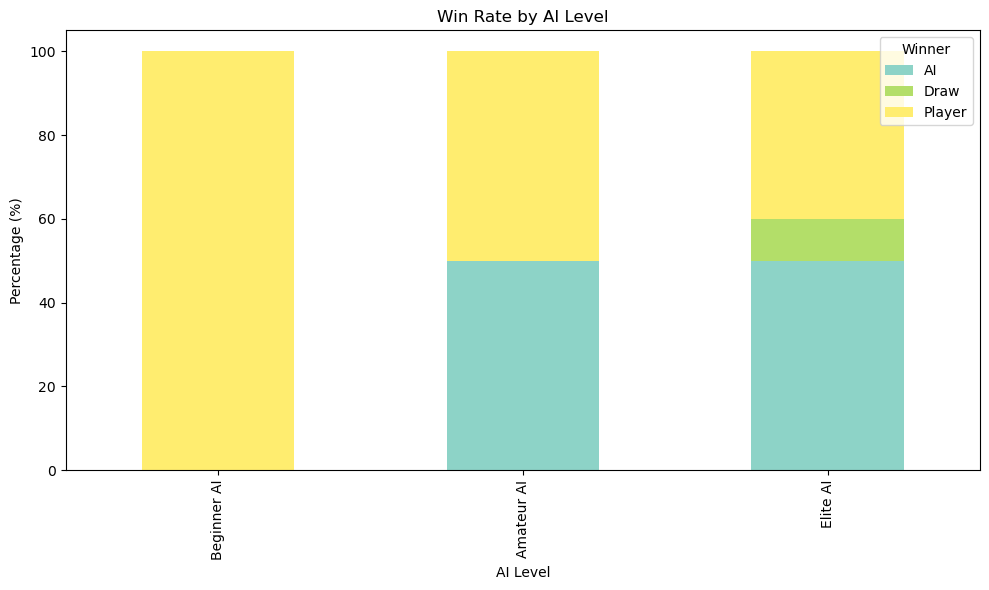

In [53]:
df['Winner'] = df['Winner'].str.strip()
df['AI_Level'] = pd.Categorical(df['AI_Level'], categories=['Beginner AI', 'Amateur AI', 'Elite AI'], ordered=True)

win_rates = df.groupby('AI_Level', observed=True)['Winner'].value_counts(normalize=True).unstack().fillna(0) * 100
win_rates.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')

plt.title('Win Rate by AI Level')
plt.ylabel('Percentage (%)')
plt.xlabel('AI Level')
plt.legend(title='Winner')
plt.tight_layout()
plt.show()


In [35]:
print(df.columns.tolist())


['AI_Level', 'Games', 'Winner', 'Avg_Move_TIme', 'Observations', 'Player_Win']


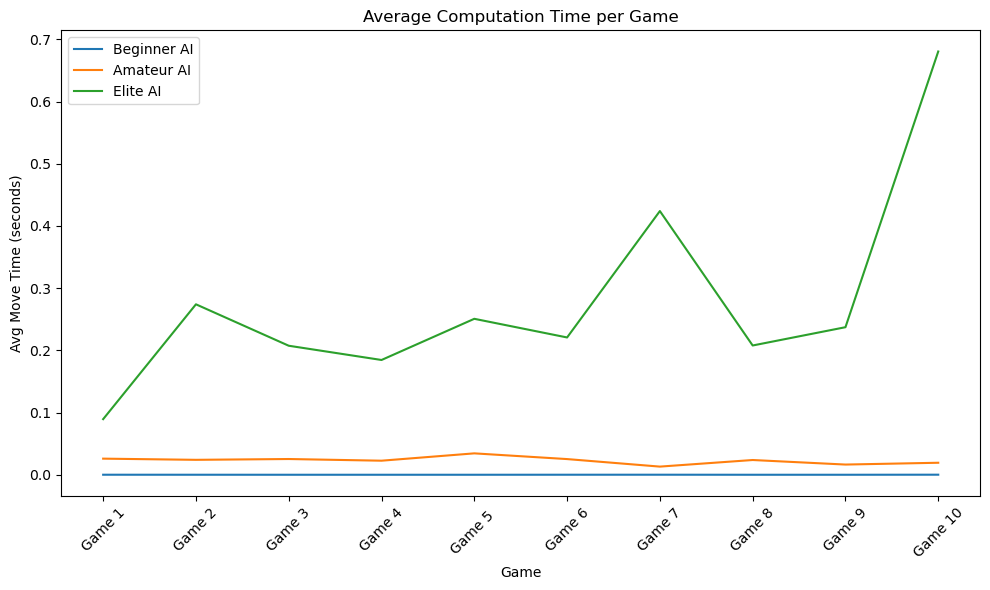

In [39]:
plt.figure(figsize=(10,6))
for level in df['AI_Level'].unique():
    subset = df[df['AI_Level'] == level]
    plt.plot(subset['Games'], subset['Avg_Move_TIme'], label=level)

plt.title('Average Computation Time per Game')
plt.xlabel('Game')
plt.ylabel('Avg Move Time (seconds)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
